In [1]:
"""
Visualize the decision of models and compare.
"""

import torch
import pandas as pd
import sys
sys.path.append("../..")
import data_utils


In [2]:
dataset = "imagenet"
models = ["vlg-cbm", "labo", "lf-cbm", "lm4cv"]

In [4]:
# Read the decision of each model.
model_paths = {model: f"./data/{dataset}/{model}.csv" for model in models}
model_dfs = {model: pd.read_csv(model_path) for model, model_path in model_paths.items()}
# Load corresponding raw data. 
dataset_raw = data_utils.get_data(dataset + "_val")

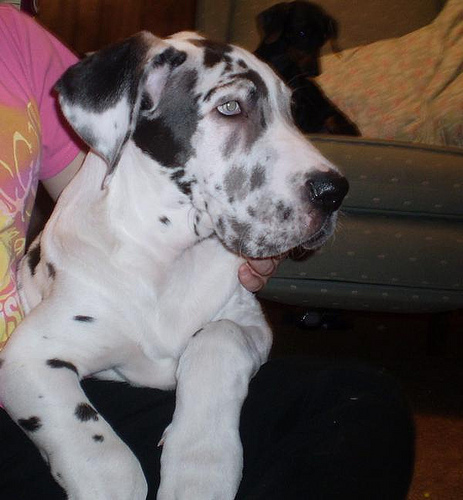

Model: vlg-cbm
1: black and white coloration (6.098827)
2: long face (5.349967)
3: black brindle or fawn coat (0.094988085)
4: droopy lips and ears (0.091788895)
5: 2 pickups (0.0)
Model: labo
1: german shorthaired pointers make great companion dogs and are excellent hunters (0.0031669373)
2: brindle, fawn, harlequin (0.0022654189)
3: light grey coat with dark grey spots (0.0015701355)
4: short-haired pointer is a hunting dog (0.0014923924)
5: black, blue, fawn, brindle, or harlequi (0.0012319802)
Model: lf-cbm
1: black pepper (1.0478866)
2: a Belgian Malinois (0.90921557)
3: a giraffe (0.9051263)
4: a big dog (0.8945505)
5: a large, rocky mass (0.77693534)
Model: lm4cv
1: English setters are bred in England (37.180588)
2: shaggy, long fur (18.311634)
3: large quantities of baked goods (9.552463)
4: typically has a "snow nose" (pinkish or black skin on the muzzle that is exposed due to cold weather) (7.271793)
5: red and white stripes on the front (6.1177454)


In [19]:
visualize_idx = 12345
visualize_img = dataset_raw[visualize_idx][0]
model_decisions = {model: model_dfs[model].iloc[visualize_idx] for model in models}
display(visualize_img)
for model, decision in model_decisions.items():
    print(f"Model: {model}")
    for i in range(1, 6):
        print(f"{i}: {decision['concept_'+str(i)]} ({decision['contrib_'+str(i)]})")